<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/ICRARproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps
from scipy import integrate
from scipy import stats, interpolate
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits

1) Cross-matching the xCOLDGASS sample with the xGASS galaxies to investigate the molecular hydrogen, H2 in the galaxy. This is in the optical region of a galaxy and therefore will not require the process used for HI.

In [2]:
hdulist = fits.open('xGASSCOLD_matched_innHI.fits')
hdu = hdulist[1].data
cols = hdulist[1].columns
# Importing data into arrays
GASS_0 = hdu['GASS']
FLAG_CO_0 = hdu['FLAG_CO']
lgMH2_0 = hdu['LOGMH2']
limlgMH2_0 = hdu['LIM_LOGMH2']
lgMH2_2_Ms_0 = hdu['LOGMH2MS']
lgMSTAR_0 = hdu['LOGMSTAR']
SFRbest_0 = hdu['SFR_best']
NUVr_0 = hdu['NUVr_1']
lgMuST_0 = hdu['lgmust']
lgMHI_in_0 = hdu['lgMHI_2Reff']
lgMHI_gl_0 = hdu['lgMHI_global']
lgSFRbest = np.log10(SFRbest_0)
print('Starting length of the dataset is', len(FLAG_CO_0))

Starting length of the dataset is 383


In [3]:
# Checking whether any of the galaxies in the dataset are missing important values
print('Data without H2 mass values:', np.where((lgMH2_0 < 0) & (limlgMH2_0 < 0))[0], np.where(np.isnan(lgMH2_0))[0], np.where(np.isnan(lgMH2_0))[0])
print('Data without stellar mass values:', np.where(lgMSTAR_0 < 0)[0], np.where(np.isnan(lgMSTAR_0))[0])
print('Data without NUV-r values:', np.where(NUVr_0 < 0)[0], np.where(np.isnan(NUVr_0))[0])
print('Data without stellar mass density values:', np.where(lgMuST_0 < 0)[0], np.where(np.isnan(lgMuST_0))[0])

Data without H2 mass values: [] [] []
Data without stellar mass values: [] []
Data without NUV-r values: [] []
Data without stellar mass density values: [] []


In [4]:
'''
# Removing from the original dataset the values that fail the checks above:
GASS = np.delete(GASS_0, (104, 105, 162, 180))
FLAG_CO = np.delete(FLAG_CO_0, (104, 105, 162, 180))
lgMH2 = np.delete(lgMH2_0, (104, 105, 162, 180))
limlgMH2 = np.delete(limlgMH2_0, (104, 105, 162, 180))
lgMH2_2_Ms = np.delete(lgMH2_2_Ms_0, (104, 105, 162, 180))
lgMSTAR = np.delete(lgMSTAR_0, (104, 105, 162, 180))
lgSFRbest = np.delete(lgSFRbest_0, (104, 105, 162, 180))
NUVr = np.delete(NUVr_0, (104, 105, 162, 180))
lgMuST = np.delete(lgMuST_0, (104, 105, 162, 180))
lgMHI_in = np.delete(lgMHI_in_0, (104, 105, 162, 180))
lgMHI_gl = np.delete(lgMHI_gl_0, (104, 105, 162, 180))
print('The number of galaxies in the dataset is now:', len(FLAG_CO))
'''

"\n# Removing from the original dataset the values that fail the checks above:\nGASS = np.delete(GASS_0, (104, 105, 162, 180))\nFLAG_CO = np.delete(FLAG_CO_0, (104, 105, 162, 180))\nlgMH2 = np.delete(lgMH2_0, (104, 105, 162, 180))\nlimlgMH2 = np.delete(limlgMH2_0, (104, 105, 162, 180))\nlgMH2_2_Ms = np.delete(lgMH2_2_Ms_0, (104, 105, 162, 180))\nlgMSTAR = np.delete(lgMSTAR_0, (104, 105, 162, 180))\nlgSFRbest = np.delete(lgSFRbest_0, (104, 105, 162, 180))\nNUVr = np.delete(NUVr_0, (104, 105, 162, 180))\nlgMuST = np.delete(lgMuST_0, (104, 105, 162, 180))\nlgMHI_in = np.delete(lgMHI_in_0, (104, 105, 162, 180))\nlgMHI_gl = np.delete(lgMHI_gl_0, (104, 105, 162, 180))\nprint('The number of galaxies in the dataset is now:', len(FLAG_CO))\n"

In [5]:
GASS = GASS_0
FLAG_CO = FLAG_CO_0
lgMH2 = lgMH2_0
limlgMH2 = limlgMH2_0
lgMH2_2_Ms = lgMH2_2_Ms_0
lgMSTAR = lgMSTAR_0
NUVr = NUVr_0
lgMuST = lgMuST_0
lgMHI_in = lgMHI_in_0
lgMHI_gl = lgMHI_gl_0
lgsSFR = np.log10((10**lgSFRbest) / (10**lgMSTAR_0))

In [6]:
# Need to separate the H2 data into the detections and the non-detection upper limits
# We can use the CO flag for this, 1 = H2 detection, 2 = no H2 detection (upper limit only)
# H2 detections
lgMH2_det = np.delete(lgMH2, (np.where(FLAG_CO > 1)))
lgMSTAR_det = np.delete(lgMSTAR, (np.where(FLAG_CO > 1)))
lgSFRbest_det = np.delete(lgSFRbest, (np.where(FLAG_CO > 1)))
NUVr_det = np.delete(NUVr, (np.where(FLAG_CO > 1)))
lgMuST_det = np.delete(lgMuST, (np.where(FLAG_CO > 1)))
lgsSFR_det = np.delete(lgsSFR, (np.where(FLAG_CO > 1)))
lgMHI_in_det = np.delete(lgMHI_in, (np.where(FLAG_CO > 1)))
lgMHI_gl_det = np.delete(lgMHI_gl, (np.where(FLAG_CO > 1)))
# H2 non-detections
limlgMH2_ndet = np.delete(limlgMH2, (np.where(FLAG_CO < 2)))
lgMSTAR_ndet = np.delete(lgMSTAR, (np.where(FLAG_CO < 2)))
lgSFRbest_ndet = np.delete(lgSFRbest, (np.where(FLAG_CO < 2)))
NUVr_ndet = np.delete(NUVr, (np.where(FLAG_CO < 2)))
lgMuST_ndet = np.delete(lgMuST, (np.where(FLAG_CO < 2)))
lgsSFR_ndet = np.delete(lgsSFR, (np.where(FLAG_CO < 2)))
lgMHI_in_ndet = np.delete(lgMHI_in, (np.where(FLAG_CO < 2)))
lgMHI_gl_ndet = np.delete(lgMHI_gl, (np.where(FLAG_CO < 2)))

2) Plotting how the H2 changes with stellar mass and SFR

In [7]:
# Finding the running median of the galaxies for H2
# Arrays for the bins
H2bins = np.linspace(9, 11.9, 10)
H2bins2 = np.linspace(-1.9, 1.5, 10)

# Array of zeroes to store the median of each bin
mH2_1 = np.zeros(len(H2bins))
H2median1 = np.zeros(len(H2bins))
H2MAD1 = np.zeros(len(H2bins))

mH2_2 = np.zeros(len(H2bins2))
H2median2 = np.zeros(len(H2bins2))
H2MAD2 = np.zeros(len(H2bins2))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(H2bins) -1):
  # Median and MAD for H2 of galaxies against stellar mass
  H2median1[i] = np.median(lgMH2_det[np.where((lgMSTAR_det >= H2bins[i]) & (lgMSTAR_det <= H2bins[i+1]))])
  H2MAD1[i] = stats.median_abs_deviation(lgMH2_det[np.where((lgMSTAR_det >= H2bins[i]) & (lgMSTAR_det <= H2bins[i+1]))])
  mH2_1[i] = H2median1[i]

for i in range (len(H2bins2) -1):
  # Median and MAD for H2 of galaxies against SFR
  H2median2[i] = np.median(lgMH2_det[np.where((lgSFRbest_det >= H2bins2[i]) & (lgSFRbest_det <= H2bins2[i+1]))])
  H2MAD2[i] = stats.median_abs_deviation(lgMH2_det[np.where((lgSFRbest_det >= H2bins2[i]) & (lgSFRbest_det <= H2bins2[i+1]))])
  mH2_2[i] = H2median2[i]

# Working out the upper and lower bounds of the median absolute deviation
H2pMAD1 = mH2_1 + H2MAD1
H2nMAD1 = mH2_1 - H2MAD1
H2pMAD2 = mH2_2 + H2MAD2
H2nMAD2 = mH2_2 - H2MAD2

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


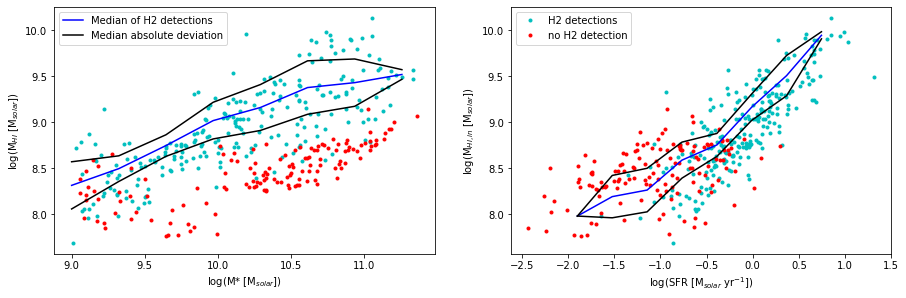

In [8]:
# Plotting the relations between the H2 mass in the galaxy and stellar mass as well as the Star formation rate
plt.figure(figsize = (15,10))
# H2 mass against Stellar mass
plt.subplot(221)
plt.plot(lgMSTAR_det, lgMH2_det, 'c.')
plt.plot(lgMSTAR_ndet, limlgMH2_ndet, 'r.')
plt.plot(H2bins[:-2], mH2_1[:-2], 'b-', label = 'Median of H2 detections')
plt.plot(H2bins[:-2], H2pMAD1[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(H2bins[:-2], H2nMAD1[:-2], 'k-')
plt.xlabel('log(M* [M$_{solar}$])')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left')

# H2 mass against Star formation rate
plt.subplot(222)
plt.plot(lgSFRbest_det, lgMH2_det, 'c.', label= 'H2 detections')
plt.plot(lgSFRbest_ndet, limlgMH2_ndet, 'r.', label= 'no H2 detection')
plt.plot(H2bins2[:-2], mH2_2[:-2], 'b-')
plt.plot(H2bins2[:-2], H2pMAD2[:-2], 'k-')
plt.plot(H2bins2[:-2], H2nMAD2[:-2], 'k-')
plt.xlabel('log(SFR [M$_{solar}$ yr$^{-1}$])')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
plt.legend(loc='upper left');

3) Comparing how the H2 mass changes with various stellar properties, plotted with how the global HI mass changes and how the HI mass inside the optical region changes

In [9]:
# Finding the running median of the galaxies in the sample for the HI global
# Arrays for the bins
HIglbins_Mstar = np.linspace(9, 11.5, 15)
HIglbins_NUVr = np.linspace(1, 7, 15)
HIglbins_sSFR = np.linspace(-11.5, -9.5, 10)
HIglbins_Must = np.linspace(7.5, 10, 10)

# Array of zeroes to store the median of each bin
MHIgl_Mstar = np.zeros(len(HIglbins_Mstar))
HIglmedian_Mstar = np.zeros(len(HIglbins_Mstar))
HIglMAD_Mstar = np.zeros(len(HIglbins_Mstar))

MHIgl_NUVr = np.zeros(len(HIglbins_NUVr))
HIglmedian_NUVr = np.zeros(len(HIglbins_NUVr))
HIglMAD_NUVr = np.zeros(len(HIglbins_NUVr))

MHIgl_sSFR = np.zeros(len(HIglbins_sSFR))
HIglmedian_sSFR = np.zeros(len(HIglbins_sSFR))
HIglMAD_sSFR = np.zeros(len(HIglbins_sSFR))

MHIgl_Must = np.zeros(len(HIglbins_Must))
HIglmedian_Must = np.zeros(len(HIglbins_Must))
HIglMAD_Must = np.zeros(len(HIglbins_Must))

In [10]:
# Using a for loop to iterate over the median values for each of the bins
for i in range(len(HIglbins_Mstar) -1):
  # Median and MAD for the Mstar graph
  HIglmedian_Mstar[i] = np.median(lgMHI_gl_det[np.where((lgMSTAR_det >= HIglbins_Mstar[i]) & (lgMSTAR_det <= HIglbins_Mstar[i+1]))])
  HIglMAD_Mstar[i] = stats.median_abs_deviation(lgMHI_gl_det[np.where((lgMSTAR_det >= HIglbins_Mstar[i]) & (lgMSTAR_det <= HIglbins_Mstar[i+1]))])
  MHIgl_Mstar[i] = HIglmedian_Mstar[i]

for i in range (len(HIglbins_NUVr) -1):
  # Median and MAD for the NUV-r graph
  HIglmedian_NUVr[i] = np.median(lgMHI_gl_det[np.where((NUVr_det >= HIglbins_NUVr[i]) & (NUVr_det <= HIglbins_NUVr[i+1]))])
  HIglMAD_NUVr[i] = stats.median_abs_deviation(lgMHI_gl_det[np.where((NUVr_det >= HIglbins_NUVr[i]) & (NUVr_det <= HIglbins_NUVr[i+1]))])
  MHIgl_NUVr[i] = HIglmedian_NUVr[i]

for i in range (len(HIglbins_sSFR) -1):
  # Median and MAD for the sSFR graph
  HIglmedian_sSFR[i] = np.median(lgMHI_gl_det[np.where((lgsSFR_det >= HIglbins_sSFR[i]) & (lgsSFR_det <= HIglbins_sSFR[i+1]))])
  HIglMAD_sSFR[i] = stats.median_abs_deviation(lgMHI_gl_det[np.where((lgsSFR_det >= HIglbins_sSFR[i]) & (lgsSFR_det <= HIglbins_sSFR[i+1]))])
  MHIgl_sSFR[i] = HIglmedian_sSFR[i]

for i in range (len(HIglbins_Must) -1):
  #Median and MAD for the Must graph
  HIglmedian_Must[i] = np.median(lgMHI_gl_det[np.where((lgMuST_det >= HIglbins_Must[i]) & (lgMuST_det <= HIglbins_Must[i+1]))])
  HIglMAD_Must[i] = stats.median_abs_deviation(lgMHI_gl_det[np.where((lgMuST_det >= HIglbins_Must[i]) & (lgMuST_det <= HIglbins_Must[i+1]))])
  MHIgl_Must[i] = HIglmedian_Must[i]

# Working out the upper and lower bounds of the median absolute deviation
# Mstar graph median bounds
HIglpMAD_Mstar = MHIgl_Mstar + HIglMAD_Mstar
HIglnMAD_Mstar = MHIgl_Mstar - HIglMAD_Mstar
# NUV-r graph median bounds
HIglpMAD_NUVr = MHIgl_NUVr + HIglMAD_NUVr
HIglnMAD_NUVr = MHIgl_NUVr - HIglMAD_NUVr
# sSFR graph median bounds
HIglpMAD_sSFR = MHIgl_sSFR + HIglMAD_sSFR
HIglnMAD_sSFR = MHIgl_sSFR - HIglMAD_sSFR
# Must graph median bounds
HIglpMAD_Must = MHIgl_Must + HIglMAD_Must
HIglnMAD_Must = MHIgl_Must - HIglMAD_Must

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
# Finding the running median of the galaxies in the sample for the HI inner
# Arrays for the bins
HIinbins_Mstar = np.linspace(9, 11.5, 15)
HIinbins_NUVr = np.linspace(1, 7, 15)
HIinbins_sSFR = np.linspace(-11.5, -9.5, 10)
HIinbins_Must = np.linspace(7.5, 10, 10)

# Array of zeroes to store the median of each bin
MHIin_Mstar = np.zeros(len(HIinbins_Mstar))
HIinmedian_Mstar = np.zeros(len(HIinbins_Mstar))
HIinMAD_Mstar = np.zeros(len(HIinbins_Mstar))

MHIin_NUVr = np.zeros(len(HIinbins_NUVr))
HIinmedian_NUVr = np.zeros(len(HIinbins_NUVr))
HIinMAD_NUVr = np.zeros(len(HIinbins_NUVr))

MHIin_sSFR = np.zeros(len(HIinbins_sSFR))
HIinmedian_sSFR = np.zeros(len(HIinbins_sSFR))
HIinMAD_sSFR = np.zeros(len(HIinbins_sSFR))

MHIin_Must = np.zeros(len(HIinbins_Must))
HIinmedian_Must = np.zeros(len(HIinbins_Must))
HIinMAD_Must = np.zeros(len(HIinbins_Must))

In [12]:
# Using a for loop to iterate over the median values for each of the bins
for i in range(len(HIinbins_Mstar) -1):
  # Median and MAD for the Mstar graph
  HIinmedian_Mstar[i] = np.median(lgMHI_in_det[np.where((lgMSTAR_det >= HIinbins_Mstar[i]) & (lgMSTAR_det <= HIinbins_Mstar[i+1]))])
  HIinMAD_Mstar[i] = stats.median_abs_deviation(lgMHI_in_det[np.where((lgMSTAR_det >= HIinbins_Mstar[i]) & (lgMSTAR_det <= HIinbins_Mstar[i+1]))])
  MHIin_Mstar[i] = HIinmedian_Mstar[i]

for i in range (len(HIinbins_NUVr) -1):
  # Median and MAD for the NUV-r graph
  HIinmedian_NUVr[i] = np.median(lgMHI_in_det[np.where((NUVr_det >= HIinbins_NUVr[i]) & (NUVr_det <= HIinbins_NUVr[i+1]))])
  HIinMAD_NUVr[i] = stats.median_abs_deviation(lgMHI_in_det[np.where((NUVr_det >= HIinbins_NUVr[i]) & (NUVr_det <= HIinbins_NUVr[i+1]))])
  MHIin_NUVr[i] = HIinmedian_NUVr[i]

for i in range (len(HIinbins_sSFR) -1):
  # Median and MAD for the sSFR graph
  HIinmedian_sSFR[i] = np.median(lgMHI_in_det[np.where((lgsSFR_det >= HIinbins_sSFR[i]) & (lgsSFR_det <= HIinbins_sSFR[i+1]))])
  HIinMAD_sSFR[i] = stats.median_abs_deviation(lgMHI_in_det[np.where((lgsSFR_det >= HIinbins_sSFR[i]) & (lgsSFR_det <= HIinbins_sSFR[i+1]))])
  MHIin_sSFR[i] = HIinmedian_sSFR[i]

for i in range (len(HIinbins_Must) -1):
  #Median and MAD for the Must graph
  HIinmedian_Must[i] = np.median(lgMHI_in_det[np.where((lgMuST_det >= HIinbins_Must[i]) & (lgMuST_det <= HIinbins_Must[i+1]))])
  HIinMAD_Must[i] = stats.median_abs_deviation(lgMHI_in_det[np.where((lgMuST_det >= HIinbins_Must[i]) & (lgMuST_det <= HIinbins_Must[i+1]))])
  MHIin_Must[i] = HIinmedian_Must[i]

# Working out the upper and lower bounds of the median absolute deviation
# Mstar graph median bounds
HIinpMAD_Mstar = MHIin_Mstar + HIinMAD_Mstar
HIinnMAD_Mstar = MHIin_Mstar - HIinMAD_Mstar
# NUV-r graph median bounds
HIinpMAD_NUVr = MHIin_NUVr + HIinMAD_NUVr
HIinnMAD_NUVr = MHIin_NUVr - HIinMAD_NUVr
# sSFR graph median bounds
HIinpMAD_sSFR = MHIin_sSFR + HIinMAD_sSFR
HIinnMAD_sSFR = MHIin_sSFR - HIinMAD_sSFR
# Must graph median bounds
HIinpMAD_Must = MHIin_Must + HIinMAD_Must
HIinnMAD_Must = MHIin_Must - HIinMAD_Must

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
# Finding the running median for the galaxies in the sample for H2
H2bins_Mstar = np.linspace(9, 11.5, 15)
H2bins_NUVr = np.linspace(1, 7, 15)
H2bins_sSFR = np.linspace(-11.5, -9.5, 10)
H2bins_Must = np.linspace(7.5, 10, 10)

# Array of zeroes to store the median of each bin
MH2_Mstar = np.zeros(len(H2bins_Mstar))
H2median_Mstar = np.zeros(len(H2bins_Mstar))
H2MAD_Mstar = np.zeros(len(H2bins_Mstar))

MH2_NUVr = np.zeros(len(H2bins_NUVr))
H2median_NUVr = np.zeros(len(H2bins_NUVr))
H2MAD_NUVr = np.zeros(len(H2bins_NUVr))

MH2_sSFR = np.zeros(len(H2bins_sSFR))
H2median_sSFR = np.zeros(len(H2bins_sSFR))
H2MAD_sSFR = np.zeros(len(H2bins_sSFR))

MH2_Must = np.zeros(len(H2bins_Must))
H2median_Must = np.zeros(len(H2bins_Must))
H2MAD_Must = np.zeros(len(H2bins_Must))

In [14]:
# Using a for loop to iterate over the median values for each of the bins
for i in range(len(H2bins_Mstar) -1):
  # Median and MAD for the Mstar graph
  H2median_Mstar[i] = np.median(lgMH2_det[np.where((lgMSTAR_det >= H2bins_Mstar[i]) & (lgMSTAR_det <= H2bins_Mstar[i+1]))])
  H2MAD_Mstar[i] = stats.median_abs_deviation(lgMH2_det[np.where((lgMSTAR_det >= H2bins_Mstar[i]) & (lgMSTAR_det <= H2bins_Mstar[i+1]))])
  MH2_Mstar[i] = H2median_Mstar[i]

for i in range (len(H2bins_NUVr) -1):
  # Median and MAD for the NUV-r graph
  H2median_NUVr[i] = np.median(lgMH2_det[np.where((NUVr_det >= H2bins_NUVr[i]) & (NUVr_det <= H2bins_NUVr[i+1]))])
  H2MAD_NUVr[i] = stats.median_abs_deviation(lgMH2_det[np.where((NUVr_det >= H2bins_NUVr[i]) & (NUVr_det <= H2bins_NUVr[i+1]))])
  MH2_NUVr[i] = H2median_NUVr[i]

for i in range (len(H2bins_sSFR) -1):
  # Median and MAD for the sSFR graph
  H2median_sSFR[i] = np.median(lgMH2_det[np.where((lgsSFR_det >= H2bins_sSFR[i]) & (lgsSFR_det <= H2bins_sSFR[i+1]))])
  H2MAD_sSFR[i] = stats.median_abs_deviation(lgMH2_det[np.where((lgsSFR_det >= H2bins_sSFR[i]) & (lgsSFR_det <= H2bins_sSFR[i+1]))])
  MH2_sSFR[i] = H2median_sSFR[i]

for i in range (len(H2bins_Must) -1):
  #Median and MAD for the Must graph
  H2median_Must[i] = np.median(lgMH2_det[np.where((lgMuST_det >= H2bins_Must[i]) & (lgMuST_det <= H2bins_Must[i+1]))])
  H2MAD_Must[i] = stats.median_abs_deviation(lgMH2_det[np.where((lgMuST_det >= H2bins_Must[i]) & (lgMuST_det <= H2bins_Must[i+1]))])
  MH2_Must[i] = H2median_Must[i]

# Working out the upper and lower bounds of the median absolute deviation
# Mstar graph median bounds
H2pMAD_Mstar = MH2_Mstar + H2MAD_Mstar
H2nMAD_Mstar = MH2_Mstar - H2MAD_Mstar
# NUV-r graph median bounds
H2pMAD_NUVr = MH2_NUVr + H2MAD_NUVr
H2nMAD_NUVr = MH2_NUVr - H2MAD_NUVr
# sSFR graph median bounds
H2pMAD_sSFR = MH2_sSFR + H2MAD_sSFR
H2nMAD_sSFR = MH2_sSFR - H2MAD_sSFR
# Must graph median bounds
H2pMAD_Must = MH2_Must + H2MAD_Must
H2nMAD_Must = MH2_Must - H2MAD_Must

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


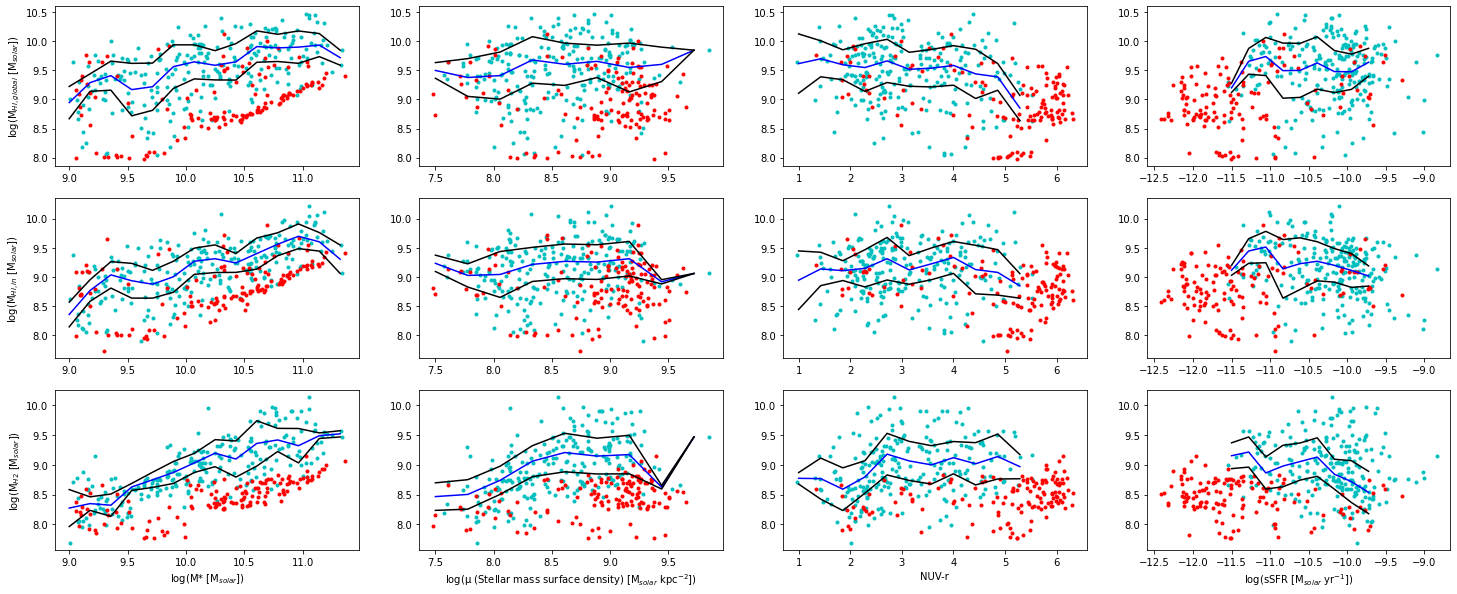

In [15]:
plt.figure(figsize=(25,10))
# Plotting the depletion times for the HI(global) mass against stellar properties
# MHI(global) against stellar mass
plt.subplot(3,4,1)
plt.plot(lgMSTAR_det, lgMHI_gl_det, 'c.')
plt.plot(lgMSTAR_ndet, lgMHI_gl_ndet, 'r.')
plt.plot(HIglbins_Mstar[:-1], MHIgl_Mstar[:-1], 'b-')
plt.plot(HIglbins_Mstar[:-1], HIglpMAD_Mstar[:-1], 'k-')
plt.plot(HIglbins_Mstar[:-1], HIglnMAD_Mstar[:-1], 'k-')
plt.ylabel('log(M$_{HI, global}$ [M$_{solar}$])')
# MHI(global) against stellar surface density
plt.subplot(3,4,2)
plt.plot(lgMuST_det, lgMHI_gl_det, 'c.')
plt.plot(lgMuST_ndet, lgMHI_gl_ndet, 'r.')
plt.plot(HIglbins_Must[:-1], MHIgl_Must[:-1], 'b-')
plt.plot(HIglbins_Must[:-1], HIglpMAD_Must[:-1], 'k-')
plt.plot(HIglbins_Must[:-1], HIglnMAD_Must[:-1], 'k-')
# MHI(global) against NUV-r
plt.subplot(3,4,3)
plt.plot(NUVr_det, lgMHI_gl_det, 'c.')
plt.plot(NUVr_ndet, lgMHI_gl_ndet, 'r.')
plt.plot(HIglbins_NUVr[:-1], MHIgl_NUVr[:-1], 'b-')
plt.plot(HIglbins_NUVr[:-1], HIglpMAD_NUVr[:-1], 'k-')
plt.plot(HIglbins_NUVr[:-1], HIglnMAD_NUVr[:-1], 'k-')
# MHI(global) against sSFR
plt.subplot(3,4,4)
plt.plot(lgsSFR_det, lgMHI_gl_det, 'c.')
plt.plot(lgsSFR_ndet, lgMHI_gl_ndet, 'r.')
plt.plot(HIglbins_sSFR[:-1], MHIgl_sSFR[:-1], 'b-')
plt.plot(HIglbins_sSFR[:-1], HIglpMAD_sSFR[:-1], 'k-')
plt.plot(HIglbins_sSFR[:-1], HIglnMAD_sSFR[:-1], 'k-')

# Plotting the depletion times for the HI(in) mass against stellar properties
# HI(in) against stellar mass
plt.subplot(3,4,5)
plt.plot(lgMSTAR_det, lgMHI_in_det, 'c.')
plt.plot(lgMSTAR_ndet, lgMHI_in_ndet, 'r.')
plt.plot(HIinbins_Mstar[:-1], MHIin_Mstar[:-1], 'b-')
plt.plot(HIinbins_Mstar[:-1], HIinpMAD_Mstar[:-1], 'k-')
plt.plot(HIinbins_Mstar[:-1], HIinnMAD_Mstar[:-1], 'k-')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
# HI(in) against stellar surface density
plt.subplot(3,4,6)
plt.plot(lgMuST_det, lgMHI_in_det, 'c.')
plt.plot(lgMuST_ndet, lgMHI_in_ndet, 'r.')
plt.plot(HIinbins_Must[:-1], MHIin_Must[:-1], 'b-')
plt.plot(HIinbins_Must[:-1], HIinpMAD_Must[:-1], 'k-')
plt.plot(HIinbins_Must[:-1], HIinnMAD_Must[:-1], 'k-')
# HI(in) against NUV-r
plt.subplot(3,4,7)
plt.plot(NUVr_det, lgMHI_in_det, 'c.')
plt.plot(NUVr_ndet, lgMHI_in_ndet, 'r.')
plt.plot(HIinbins_NUVr[:-1], MHIin_NUVr[:-1], 'b-')
plt.plot(HIinbins_NUVr[:-1], HIinpMAD_NUVr[:-1], 'k-')
plt.plot(HIinbins_NUVr[:-1], HIinnMAD_NUVr[:-1], 'k-')
# HI(in) against sSFR
plt.subplot(3,4,8)
plt.plot(lgsSFR_det, lgMHI_in_det, 'c.')
plt.plot(lgsSFR_ndet, lgMHI_in_ndet, 'r.')
plt.plot(HIinbins_sSFR[:-1], MHIin_sSFR[:-1], 'b-')
plt.plot(HIinbins_sSFR[:-1], HIinpMAD_sSFR[:-1], 'k-')
plt.plot(HIinbins_sSFR[:-1], HIinnMAD_sSFR[:-1], 'k-')

# Plotting the depletion times for the H2 mass against stellar properties
# H2 against stellar mass
plt.subplot(3,4,9)
plt.plot(lgMSTAR_det, lgMH2_det, 'c.')
plt.plot(lgMSTAR_ndet, limlgMH2_ndet, 'r.')
plt.plot(H2bins_Mstar[:-1], MH2_Mstar[:-1], 'b-')
plt.plot(H2bins_Mstar[:-1], H2pMAD_Mstar[:-1], 'k-')
plt.plot(H2bins_Mstar[:-1], H2nMAD_Mstar[:-1], 'k-')
plt.ylabel('log(M$_{H2}$ [M$_{solar}$])')
plt.xlabel('log(M* [M$_{solar}$])')
# H2 against stellar surface density
plt.subplot(3,4,10)
plt.plot(lgMuST_det, lgMH2_det, 'c.')
plt.plot(lgMuST_ndet, limlgMH2_ndet, 'r.')
plt.plot(H2bins_Must[:-1], MH2_Must[:-1], 'b-')
plt.plot(H2bins_Must[:-1], H2pMAD_Must[:-1], 'k-')
plt.plot(H2bins_Must[:-1], H2nMAD_Must[:-1], 'k-')
plt.xlabel('log(μ (Stellar mass surface density) [M$_{solar}$ kpc$^{-2}$])')
# H2 against NUVr
plt.subplot(3,4,11)
plt.plot(NUVr_det, lgMH2_det, 'c.')
plt.plot(NUVr_ndet, limlgMH2_ndet, 'r.')
plt.plot(H2bins_NUVr[:-1], MH2_NUVr[:-1], 'b-')
plt.plot(H2bins_NUVr[:-1], H2pMAD_NUVr[:-1], 'k-')
plt.plot(H2bins_NUVr[:-1], H2nMAD_NUVr[:-1], 'k-')
plt.xlabel('NUV-r')
# H2 against sSFR
plt.subplot(3,4,12)
plt.plot(lgsSFR_det, lgMH2_det, 'c.')
plt.plot(lgsSFR_ndet, limlgMH2_ndet, 'r.')
plt.plot(H2bins_sSFR[:-1], MH2_sSFR[:-1], 'b-')
plt.plot(H2bins_sSFR[:-1], H2pMAD_sSFR[:-1], 'k-')
plt.plot(H2bins_sSFR[:-1], H2nMAD_sSFR[:-1], 'k-')
plt.xlabel('log(sSFR [M$_{solar}$ yr$^{-1}$])');